# Agent Simulation using Random Walk
## Introduction
Complete as many steps as possible in the available time. Unless agreed in previous discussions, please
use Python. As well as correctness of the solution, we are looking for good code structure and engineering
practices. The task is expected to take approximately 8 hours in total, however we appreciate that this
may depend on individual candidate experience and the amount of time available. Therefore, while a
solution to all steps is preferable, partial implementations will also be considered.

## Part 1 - Random walk
Simulate a random walk, generating a “Brownian motion”-like time-series of values {xi}N i=0 where x0 = 1.0,
and subsequent xis are computed by applying a percentage change to xi−1. At each step, the percentage change is a random number, uniformly distributed between −1% and 1%.

Simulate this random walk for N = 1000, and plot the result for 10 runs.

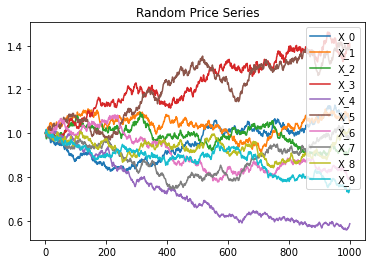

In [1]:
from timeseries import random_walk
import numpy as np
import  random;
import  matplotlib.pyplot as plt;

#Initialize random generator to have consistency among Runs
random.seed(1234)
minTick = 0.01
N = 1000

index = range(0,1000)
for i in range(0,10):
    w = random_walk.RandomWalk.generate(1000)
    plt.plot(index,w, label = f"X_{i}")
plt.title("Random Price Series")
plt.legend(loc="upper right")
plt.show()


# Part 2 - Price data and random trading
Assume that the time-series data generated by part 1 is the price (in USD) of some asset.
Implement a simple simulation including two “random” agents, each with the following behaviour: at each timestep,
the agent randomly tries to with buy or sell 1 unit of the asset at the current market price.
If one agent tries to buy and the other tries to sell, their orders are matched and the trade succeeds.
Otherwise the orders are cancelled and must be resubmitted at the next timestep.





[time: 0 - Random Agent 1] - Asset Holdings 99.0, USD Holdings: 101.0]
[time: 0 - Random Agent 2] - Asset Holdings 101.0, USD Holdings: 99.0]
[time: 100 - Random Agent 1] - Asset Holdings 91.0, USD Holdings: 108.76227747911938]
[time: 100 - Random Agent 2] - Asset Holdings 109.0, USD Holdings: 91.23772252088062]
[time: 200 - Random Agent 1] - Asset Holdings 95.0, USD Holdings: 105.19179875973899]
[time: 200 - Random Agent 2] - Asset Holdings 105.0, USD Holdings: 94.80820124026101]
[time: 300 - Random Agent 1] - Asset Holdings 83.0, USD Holdings: 115.77441589112804]
[time: 300 - Random Agent 2] - Asset Holdings 117.0, USD Holdings: 84.22558410887196]
[time: 400 - Random Agent 1] - Asset Holdings 75.0, USD Holdings: 122.78390556787913]
[time: 400 - Random Agent 2] - Asset Holdings 125.0, USD Holdings: 77.21609443212087]
[time: 500 - Random Agent 1] - Asset Holdings 74.0, USD Holdings: 123.53961946033574]
[time: 500 - Random Agent 2] - Asset Holdings 126.0, USD Holdings: 76.46038053966426

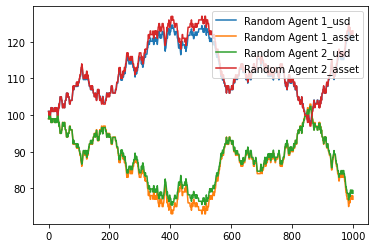

In [2]:

from runner.runner import *
from timeseries.random_walk import RandomWalk
from agents.trading_agents import *
from exchange import OrderBook



order_book = OrderBook()
agent1 = RandomTradingAgent(order_book,"Random Agent 1")
agent2 = RandomTradingAgent(order_book,"Random Agent 2")
agents = [agent1,agent2]

time_series = RandomWalk.generate(1000)
simulator =  Simulator(agents,time_series,order_book)
simulator.run()


# Part 3 - “Momentum” agent
In addition to the random agent, implement a “momentum agent” who buys (or sells) 1 unit of the asset
at market price when MA21 crosses MA5 upwards (or downwards, respectively).
Implement a simulation with 2 random agents, and 1 momentum agent. Similarly to part 2, orders will be
cancelled if not matched at each timestamp. If multiple orders can be matched, then they are matched
randomly.



[time: 0 - Random Agent 1] - Asset Holdings 100.0, USD Holdings: 100.0]
[time: 0 - Random Agent 2] - Asset Holdings 100.0, USD Holdings: 100.0]
[time: 0 - Momentum Agent] - Asset Holdings 100.0, USD Holdings: 100.0]
[time: 100 - Random Agent 1] - Asset Holdings 94.0, USD Holdings: 106.31659532775652]
[time: 100 - Random Agent 2] - Asset Holdings 108.0, USD Holdings: 91.61106895804777]
[time: 100 - Momentum Agent] - Asset Holdings 98.0, USD Holdings: 102.07233571419572]
[time: 200 - Random Agent 1] - Asset Holdings 91.0, USD Holdings: 109.77443380215375]
[time: 200 - Random Agent 2] - Asset Holdings 110.0, USD Holdings: 89.23200075902078]
[time: 200 - Momentum Agent] - Asset Holdings 99.0, USD Holdings: 100.99356543882547]
[time: 300 - Random Agent 1] - Asset Holdings 97.0, USD Holdings: 104.27841679209985]
[time: 300 - Random Agent 2] - Asset Holdings 108.0, USD Holdings: 90.89361193473005]
[time: 300 - Momentum Agent] - Asset Holdings 95.0, USD Holdings: 104.8279712731701]
[time: 400 

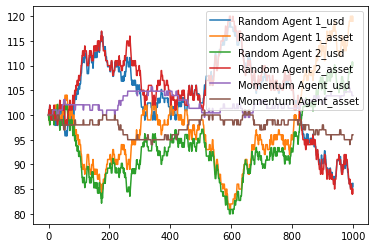

In [3]:
from runner.runner import *
from timeseries.random_walk import *
from agents.trading_agents import *
from exchange import OrderBook

order_book = OrderBook()
agent1 = RandomTradingAgent(order_book,"Random Agent 1")
agent2 = RandomTradingAgent(order_book,"Random Agent 2")
agent3 = MomentumTradingAgent(order_book,"Momentum Agent",2,5)
agents = [agent1,agent2,agent3]

time_series = RandomWalk.generate(1000)
simulator =  Simulator(agents,time_series,order_book)
simulator.run()

# Part 4 - “Mean revert” agent
In addition to the random agent and momentum agent, implement a mean-revert agent who buys (or sells) 1 unit of the asset at market price when its trailing 4-timestamp-price-position2 is less than 25% (or above 75%). Orders are matched under the same mechanism as part 3.


[time: 0 - Random Agent 1] - Asset Holdings 101.0, USD Holdings: 99.0]
[time: 0 - Random Agent 2] - Asset Holdings 99.0, USD Holdings: 101.0]
[time: 0 - Mean Revert Agent] - Asset Holdings 100.0, USD Holdings: 100.0]
[time: 100 - Random Agent 1] - Asset Holdings 107.0, USD Holdings: 92.65496520991388]
[time: 100 - Random Agent 2] - Asset Holdings 91.0, USD Holdings: 109.47718611218879]
[time: 100 - Mean Revert Agent] - Asset Holdings 102.0, USD Holdings: 97.86784867789733]
[time: 200 - Random Agent 1] - Asset Holdings 105.0, USD Holdings: 94.72608210715907]
[time: 200 - Random Agent 2] - Asset Holdings 89.0, USD Holdings: 111.63995103932191]
[time: 200 - Mean Revert Agent] - Asset Holdings 106.0, USD Holdings: 93.63396685351903]
[time: 300 - Random Agent 1] - Asset Holdings 101.0, USD Holdings: 98.66090950407497]
[time: 300 - Random Agent 2] - Asset Holdings 94.0, USD Holdings: 106.55669064098272]
[time: 300 - Mean Revert Agent] - Asset Holdings 105.0, USD Holdings: 94.78239985494233]


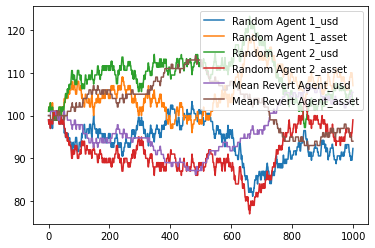

In [4]:
from runner.runner import *
from timeseries.random_walk import *
from agents.trading_agents import *
from exchange import OrderBook



order_book = OrderBook()
agent1 = RandomTradingAgent(order_book,"Random Agent 1")
agent2 = RandomTradingAgent(order_book,"Random Agent 2")
agent3 = MeanRevertTradingAgent(order_book,"Mean Revert Agent",4)
agents = [agent1,agent2,agent3]

time_series = RandomWalk.generate(1000)
simulator =  Simulator(agents,time_series,order_book)
simulator.run()